<a name = "inicio"></a>
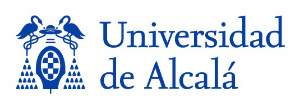

# Índice
1. [Presentación](#Presentación)
1. [Introducción a las estructuras de datos de pandas](#Introducción-a-las-estructuras-de-datos-de-pandas)
1. [Creación de series y dataframes](#Creación-de-series-y-dataframes)
1. [Inspección de series y dataframes](#Inspección-de-series-y-dataframes)
1. [Selección de datos](#Selección-de-datos)
1. [Edición de series y dataframes](#Edición-de-series-y-dataframes)
1. [Unión de series y dataframes](#Unión-de-series-y-dataframes)
1. [Gestión de valores nulos](#Gestión-de-valores-nulos)
1. [Agrupaciones](#Agrupaciones)
1. [Lectura y escritura de ficheros](#Lectura-y-escritura-de-ficheros)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Presentación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Importa la librería pandas y comprueba su versión</div>
</div>

Importamos pandas:

In [2]:
import pandas

Para comprobar su versión, recurrimos al mismo método que vimos para NumPy:

In [3]:
pandas.__version__

'0.24.1'

# Introducción a las estructuras de datos de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Comprueba el tipo devuelto por el atributo values de la siguiente serie:</div>
    s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Mar"])
</div>

In [4]:
s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Mar"])
s

Ene    15
Feb    12
Mar    21
dtype: int64

Comprobemos el tipo:

In [5]:
type(s.values)

numpy.ndarray

Se trata de un array NumPy

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Comprueba el tipo de alguna columna del dataframe anterior</div>
</div>

Replicamos el dataframe:

In [6]:
d = {
    "Compras": [41, 32, 56, 18],
    "Ventas": [17, 54, 6, 78]
}

df = pd.DataFrame(d)
df

,Compras,Ventas
0,41,17
1,32,54
2,56,6
3,18,78


In [7]:
type(df["Compras"])

pandas.core.series.Series

Efectivamente, se trata de una serie pandas:

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>¿De qué tipo es el resultado devuelto por el atributo values aplicado al array anterior? ¿Cuál es su tamaño?</div>
</div>

Veamos su tipo:

In [8]:
type(df.values)

numpy.ndarray

Se trata también de un array NumPy. ¿Y su tamaño?:

In [9]:
df.values.shape

(4, 2)

Se trata de un array de dos dimensiones compuesto por 4 filas y 2 columnas.

# Creación de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Crea un dataframe en el que se muestren por filas los símbolos de elementos químicos (Hidrógeno, Helio y Litio) y en columnas el nombre del elemento y su número atómico</div>
</div>

Buscamos una tabla períodica en internet, por ejemplo la proveída en la wikipedia:

https://es.wikipedia.org/wiki/Tabla_peri%C3%B3dica_de_los_elementos#/media/Archivo:Periodic_table_large-es-updated-2018.svg

Creamos el dataframe a partir, por ejemplo, de un diccionario. El índice se indica explícitamente:

In [10]:
tabla_periodica = pd.DataFrame({
    "Nombre": ["Hidrógeno", "Helio", "Litio"],
    "Nº atómico": [1, 2, 3]
    },
    index = ["H", "He", "Li"]
)
tabla_periodica

,Nombre,Nº atómico
H,Hidrógeno,1
He,Helio,2
Li,Litio,3


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Crea un dataframe ("Ventas") a partir de un array NumPY de números enteros aleatorios entre 0 y 20 -ambos incluidos- de dimensiones 6x5.</div>
<div>Aplica a las filas un índice que represente el mes de enero a junio (usa solo tres letras minúsculas por mes)</div>
<div>Aplica a las columnas las etiquetas de la "A" a la "E".</div>
</div>

Creamos el array NumPy:

In [11]:
a = np.random.randint(0, 21, size = (6, 5))
a

array([[ 4, 16,  9, 12, 14],
       [ 1,  0,  8, 12,  0],
       [ 2, 18,  8, 20, 15],
       [12, 20,  5,  8, 18],
       [20, 17, 13,  1,  6],
       [ 5, 18, 14,  8,  1]])

Creamos ahora el dataframe:

In [12]:
columns = ["A", "B", "C", "D", "E"]
index = ["ene", "feb", "mar", "abr", "may", "jun"]
Ventas = pd.DataFrame(a, index = index, columns = columns)
Ventas

,A,B,C,D,E
ene,4,16,9,12,14
feb,1,0,8,12,0
mar,2,18,8,20,15
abr,12,20,5,8,18
may,20,17,13,1,6
jun,5,18,14,8,1


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Usa el siguiente código para cargar un dataframe proveído por la librería Seaborn y contesta las siguientes preguntas:</div>
<div>tips = sns.load_dataset("tips")</div>
<ul>
    <li>¿Puedes confirmar el tipo?</li>
    <li>¿Cuáles son sus dimensiones?</li>
    <li>Imprime el índice de filas</li>
    <li>Imprime el índice de columnas</li>
</ul>
</div>

In [13]:
tips = sns.load_dataset("tips")

In [14]:
type(tips)

pandas.core.frame.DataFrame

Se trata de un dataframe pandas

In [15]:
tips.shape

(244, 7)

244 filas y 7 columnas

Índice de filas:

In [16]:
tips.index

RangeIndex(start=0, stop=244, step=1)

Índice de columnas:

In [17]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Inspección de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Utilizando el siguiente código que carga el dataframe conteniendo información sobre los pasajeros del Titanic:</div>
<div>titanic = sns.load_dataset("titanic")</div>
<div>...responde las siguientes preguntas</div>
<ul>
    <li>Muestra los 3 primeros registros</li>
    <li>¿De cuántos pasajeros tenemos información?</li>
	<li>Para cada pasajero ¿cuántos datos hay en el dataframe? (sin contarlos a mano)</li>
</ul>
</div>

Cargamos el dataframe

In [18]:
titanic = sns.load_dataset("titanic")

Mostramos los primeros tres registros:

In [19]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [20]:
titanic.shape

(891, 15)

Tenemos información de 891 pasajeros

In [21]:
len(titanic.columns)

15

Hay 15 variables

# Selección de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Usando el dataframe titanic, responde a las siguientes preguntas:</div>
<div></div>
<div></div>
<ul>
    <li>¿Cuál es el género del primer pasajero de la lista?</li>
    <li>¿Cuánto pagaron los pasajeros cuyos índices son 99, 100 y 102?</li>
    <li>¿Donde embarcaron los últimos tres pasajeros?</li>
</ul>
</div>

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Vemos que se trata de un hombre, pero obtengamos este resultado extrayendo el dato exacto:

In [23]:
titanic.sex[0]

'male'

Podemos también hacer uso del método .iloc:

In [24]:
titanic.sex.iloc[0]

'male'

Para saber cuánto pagaron los pasajeros indicados, podemos extraer sus valores usando una lista:

In [25]:
titanic.fare[[99, 100, 102]]

99     26.0000
100     7.8958
102    77.2875
Name: fare, dtype: float64

Por último, mostramos los últimos tres valores de la columna "embark_town":

In [26]:
titanic.embark_town.iloc[-3:]

888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, dtype: object

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Utilizando dataframe sobre los pasajeros del Titanic (titanic):</div>
<ul>
    <li>¿Qué porcentaje de pasajeros falleció?</li>
</ul>
</div>

Recordemos la estructura de este dataset:

In [27]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Calculamos el número de pasajeros que sobrevivieron y los que no aplicando selección con booleanos::

In [28]:
vivos = titanic[titanic.survived == 1].shape[0]
vivos

342

En la anterior celda, nos hemos quedado con el primer valor de la tupla devuelta por shape (es decir, el número de filas)

In [29]:
fallecidos = titanic[titanic.survived == 0].shape[0]
fallecidos

549

In [30]:
fallecidos / (vivos + fallecidos)

0.6161616161616161

Falleció el 61% de los pasajeros

# Edición de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Genera un dataframe a partir de Ventas sustituyendo todos los valores mayores o iguales a 10 por ceros</div>
</div>

In [31]:
Ventas

,A,B,C,D,E
ene,4,16,9,12,14
feb,1,0,8,12,0
mar,2,18,8,20,15
abr,12,20,5,8,18
may,20,17,13,1,6
jun,5,18,14,8,1


In [32]:
Ventas.where(Ventas >= 10, 0)

,A,B,C,D,E
ene,0,16,0,12,14
feb,0,0,0,12,0
mar,0,18,0,20,15
abr,12,20,0,0,18
may,20,17,13,0,0
jun,0,18,14,0,0


El método no modifica el dataframe original salvo que se utilice el parámetro inplace.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga el dataframe iris con la siguiente instrucción:</div>
<div>iris = sns.load_dataset("iris")</div>
<ul>
    <li>Elimina las columnas que no sean numéricas</li>
</ul>
</div>

Cargamos el dataframe:

In [33]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Tenemos que eliminar la columna "species". Lo hacemos con el método .drop especificando el eje:

In [34]:
iris.drop("species", axis = 1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Unión de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Imagina que el dataframe Ventas contiene ventas de los productos para los meses incluidos. Ahora recibes las ventas de diciembre ("jul") para estos productos (1, 2, 3, 4 y 5, respectivamente, por ejemplo). Genera un dataframe concatenando a Ventas los nuevos datos usando el método append.</div>
</div>

In [35]:
Ventas

,A,B,C,D,E
ene,4,16,9,12,14
feb,1,0,8,12,0
mar,2,18,8,20,15
abr,12,20,5,8,18
may,20,17,13,1,6
jun,5,18,14,8,1


Si intentamos aplicar el método append entre un dataframe y una serie recibimos el aviso de que la serie debe tener nombre. Además, tendremos que especificar el índice de "productos":

In [36]:
s = pd.Series([1, 2, 3, 4, 5], index = ["A", "B", "C", "D", "E"], name = "jul")
s

A    1
B    2
C    3
D    4
E    5
Name: jul, dtype: int64

Ahora ya podemos pasar la serie como argumento del método .append:

In [37]:
Ventas.append(s)

,A,B,C,D,E
ene,4,16,9,12,14
feb,1,0,8,12,0
mar,2,18,8,20,15
abr,12,20,5,8,18
may,20,17,13,1,6
jun,5,18,14,8,1
jul,1,2,3,4,5


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataset del Titanic, crea una nueva columna en la que se asigne un valor a cada pasajero en función del precio que haya pagado, de forma que el que más haya pagado reciba un 1, el siguiente un 2, etc.</div>
</div>

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Para crear la columna solicitada recurrimos al método *rank* de series. Así:

In [39]:
titanic.fare.rank().head()

0     77.0
1    789.0
2    232.5
3    748.0
4    264.0
Name: fare, dtype: float64

...devuelve el rango solicitado. Creemos la columna en el dataframe:

In [40]:
titanic["fare_rank"] = titanic.fare.rank(method = "max")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_rank
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,83.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,789.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,241.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,750.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,285.0


El ejercicio no especifica cómo tratar a aquellos pasajeros que hayan pagado la misma cantidad, de forma que damos por razonable el uso del argumento *method = "max"* según el cual, en caso de coincidencia, todos los pasajeros reciben el mayor rango de los que recibirían si se asignasen rangos diferentes (quedando de esta forma rangos sin cubrir).

# Gestión de valores nulos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataframe del Titanic, sustituye todos los NaN's de la columna *age* por la edad media de los pasajeros para los que sí se dispone de dicho dato.</div>
</div>

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_rank
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,83.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,789.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,241.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,750.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,285.0


¿Cuántas filas hay en las que el campo *age* tome el valor NaN?:

In [42]:
titanic.age.isnull().sum()

177

Veamos cuál es el valor medio de la columna *age*:

In [43]:
titanic.age.mean()

29.69911764705882

Ahora tenemos que sustituir los NaN por dicho valor:

In [44]:
titanic.age = titanic.age.fillna(titanic.age.mean())

(también podríamos haber usado el argumento *inplace = True* para no tener que realizar la asignación anterior)

Comprobemos ahora el número de NaN de la columna:

In [45]:
titanic.age.isnull().sum()

0

# Agrupaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataset del Titanic, muestra el número de pasajeros y la edad media de los supervivientes segmentando los datos por cubierta (campo "deck") y sexo de cada pasajero.</div>
</div>

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_rank
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,83.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,789.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,241.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,750.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,285.0


Indicamos como índice de la tabla dinámica el campo "deck" y como columna el campo "sex" (también podría ser al revés, pues el ejercicio no lo especifica). A valores llevamos el campo "age" y especificamos como funciones de agregación tanto el recuento como el valor medio:

In [47]:
titanic.pivot_table(index = "deck", columns = "sex", values = "age", aggfunc = ["count", "mean"])

count             mean           
sex  female  male     female       male
deck                                   
A       1.0  14.0  48.000000  41.364097
B      27.0  20.0  31.099967  39.634956
C      27.0  32.0  33.644379  36.550460
D      18.0  15.0  39.094395  37.713275
E      15.0  17.0  33.593216  41.117647
F       5.0   8.0  24.139824  19.774890
G       4.0   NaN  14.750000        NaN

# Lectura y escritura de ficheros
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Guarda el dataframe iris en un fichero y vuelve a leerlo.</div>
</div>

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Guardamos el fichero en disco con el método .to_csv():

In [49]:
iris.to_csv("iris.csv")

A continuación lo leemos con la función pd.read_csv(). Es necesario especificar el argumento index_col = 0 para que considere la primera columna como índices:

In [50]:
i = pd.read_csv(
    "iris.csv",
    index_col = 0       # Columna a considerar índice
)
i.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
